# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`. You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [23]:
# Import relevant packages

### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
aqi = pd.read_csv('c4_epa_air_quality.csv')

In [4]:
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [16]:
# Explore your DataFrame `aqi`.

### YOUR CODE HERE ###

#aqi.dropna(inplace=True)
#aqi['date_local'] = pd.to_datetime(aqi['date_local'])
#aqi['aqi'].describe()
#print(aqi['state_name'].unique())
#len(aqi['state_name'].unique())


['Arizona' 'Ohio' 'Wyoming' 'Pennsylvania' 'Iowa' 'Hawaii' 'Colorado'
 'Minnesota' 'Indiana' 'Missouri' 'Connecticut' 'California' 'Nevada'
 'Virginia' 'Rhode Island' 'Texas' 'Illinois' 'Kansas' 'Maryland'
 'New Jersey' 'Massachusetts' 'Maine' 'Idaho' 'Florida' 'Vermont'
 'Tennessee' 'Georgia' 'South Dakota' 'North Carolina' 'Michigan'
 'Nebraska' 'Alabama' 'Washington' 'Kentucky' 'Oklahoma' 'New York'
 'North Dakota' 'Montana' 'Utah' 'Delaware' 'New Hampshire' 'Louisiana'
 'Mississippi' 'New Mexico' 'Oregon' 'District Of Columbia' 'Arkansas'
 'Puerto Rico' 'South Carolina' 'Alaska' 'Wisconsin']


51

In [23]:
aqi['state_name'].value_counts()[:5]

California    66
Arizona       14
Ohio          12
Florida       12
Texas         10
Name: state_name, dtype: int64

In [6]:
aqi['state_name'].value_counts()#[-5:]

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

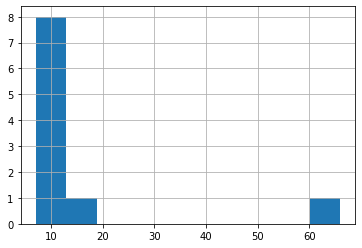

In [5]:
aqi['state_name'].value_counts()[:10].hist();

**Question:** What time range does this data cover?

The data is one day observations (2018-01-01) in multiple locations.


**Question:** What are the minimum and maximum AQI values observed in the dataset?

count    257.00

mean       6.782101

std        7.091422

min        0.00

25%        2.00

50%        5.00

75%        9.00

max       50.00

**Question:** Are all states equally represented in the dataset?

not that much.
top representers
California    66

Arizona       14

Ohio          12

Florida       12

Texas         10

on the other side of the spectrum

Delaware        1

South Dakota    1

Nebraska        1

North Dakota    1

Wisconsin       1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [32]:
# Summarize the mean AQI for RRE states.


'''
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

rredf = aqi[aqi['state_name'].isin(rre_states)]
'''

### YOUR CODE HERE ###
# Create a list of RRE states.
RRE = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']
# Subset `aqi` to only consider these states.
ca = aqi[aqi['state_name'] == 'California']
fl = aqi[aqi['state_name'] == 'Florida'] 
mi = aqi[aqi['state_name'] == 'Michigan']
oh = aqi[aqi['state_name'] == 'Ohio'] 
pa = aqi[aqi['state_name'] == 'Pennsylvania']
tx = aqi[aqi['state_name'] == 'Texas'] 

REEdf = pd.concat([ca, fl, mi, oh, pa, tx])
# Find the mean aqi for each of the RRE states.'''
ca_mean = ca['aqi'].mean()
fl_mean = fl['aqi'].mean()
mi_mean = mi['aqi'].mean()
oh_mean = oh['aqi'].mean()
pa_mean = pa['aqi'].mean()
tx_mean = tx['aqi'].mean()

sample_means = [
    ca_mean, 
    fl_mean, 
    mi_mean,
    oh_mean, 
    pa_mean, 
    tx_mean
]

REEdf.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


In [10]:
sample_means = pd.Series(sample_means)
sample_means.describe()

count     6.000000
mean      5.777609
std       3.728013
min       2.700000
25%       3.008333
50%       4.416667
75%       7.458333
max      12.121212
dtype: float64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

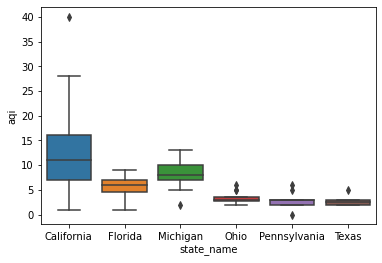

In [34]:
# Import seaborn as sns.

### YOUR CODE HERE ###
sns.boxplot(x=REEdf["state_name"],y=REEdf["aqi"]);

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

In [14]:
### YOUR CODE HERE ###
def distribution(df, col):
    
    mean = df[col].mean()
    SD   = df[col].std()
    
    lowerLim = mean - 1 * SD
    upperLim = mean + 1 * SD

    pct1 = round(((df[col] >= lowerLim) & (df[col] <= upperLim)).mean(), 2)

    ## 2SD from the mean

    lowerLim2 = mean - 2 * SD
    upperLim2 = mean + 2 * SD

    pct2 = round(((df[col] >= lowerLim2) & (df[col] <= upperLim2)).mean(), 2)

    ## 3SD from the mean
    
    lowerLim3 = mean - 3 * SD
    upperLim3 = mean + 3 * SD

    pct3 = round(((df[col] >= lowerLim3) & (df[col] <= upperLim3)).mean(), 2)
    plt.figure(figsize=( 11.7,8.27))
    ax = plt.subplot()
    p = sns.histplot(data=df[col], kde=col, hue=None, legend=False)
    plt.legend(title='Values within 1, 2, 3 SD from the mean', loc='upper left',\
               labels=[pct1, pct2, pct3])
    ax.set_title(col)
    
    ax.axvline(x=lowerLim, color='r', linestyle='dotted')
    ax.axvline(x=upperLim, color='r', linestyle='dotted')
    
    ax.axvline(x=lowerLim2, color='b', linestyle='dashed')
    ax.axvline(x=upperLim2, color='b',linestyle='dashed')
    
    ax.axvline(x=lowerLim3, color='g', linestyle='dashdot')
    ax.axvline(x=upperLim3, color='g', linestyle='dashdot')
    ## qqplot from stats
    sm.qqplot(df[col], fit=True, line='45')
    
    plt.show(p)
    print(mean)
    

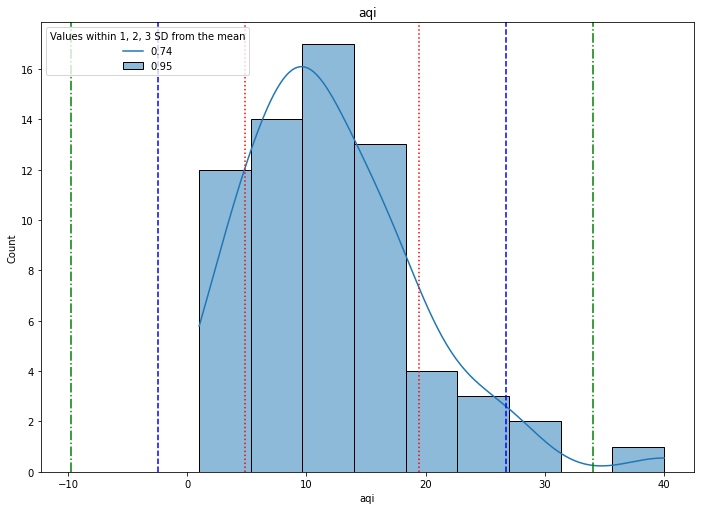

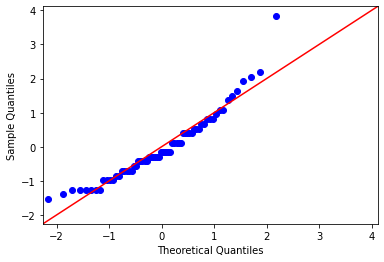

12.121212121212121


In [15]:
distribution(ca, 'aqi')

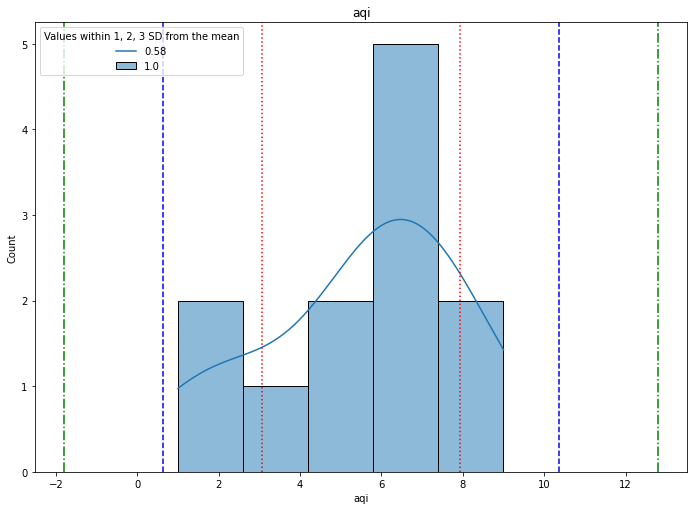

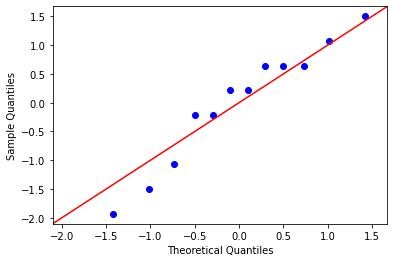

5.5


In [16]:
distribution(fl, 'aqi')

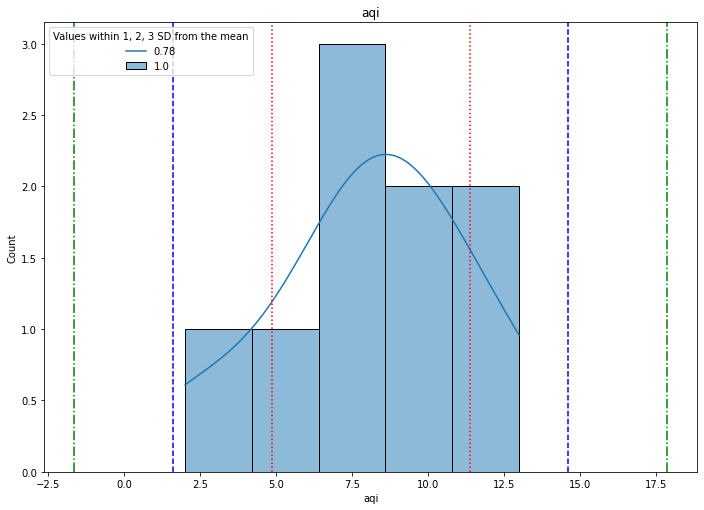

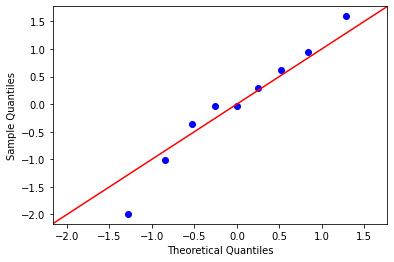

8.11111111111111


In [17]:
distribution(mi, 'aqi')

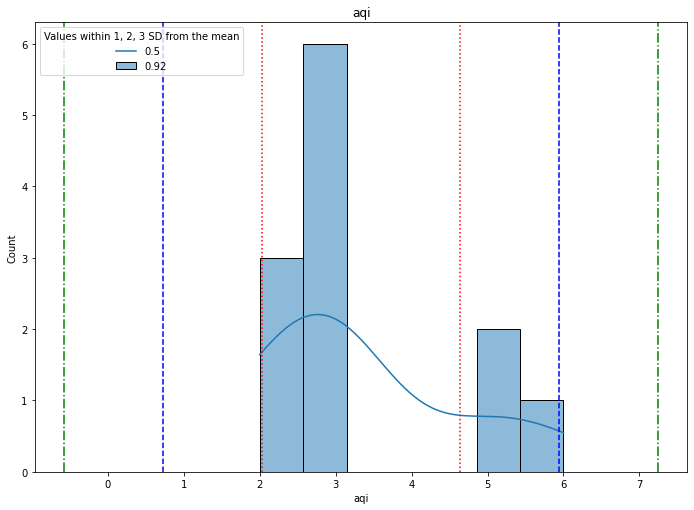

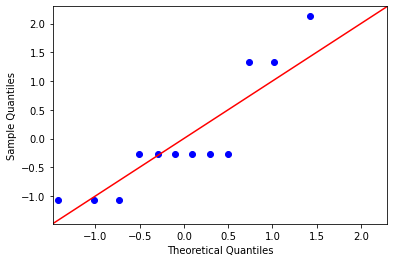

3.3333333333333335


In [18]:
distribution(oh, 'aqi')

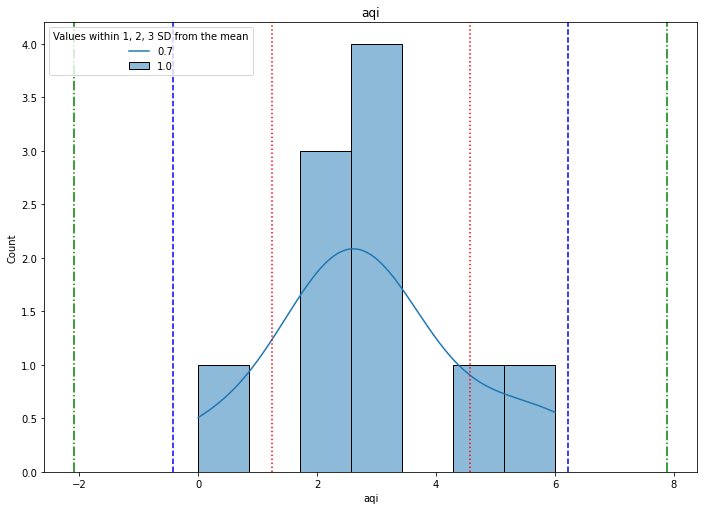

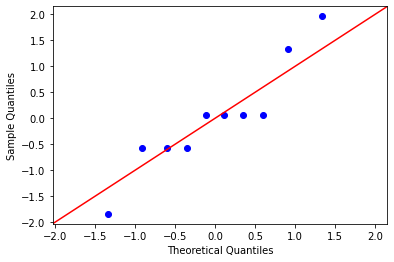

2.9


In [19]:
distribution(pa, 'aqi')

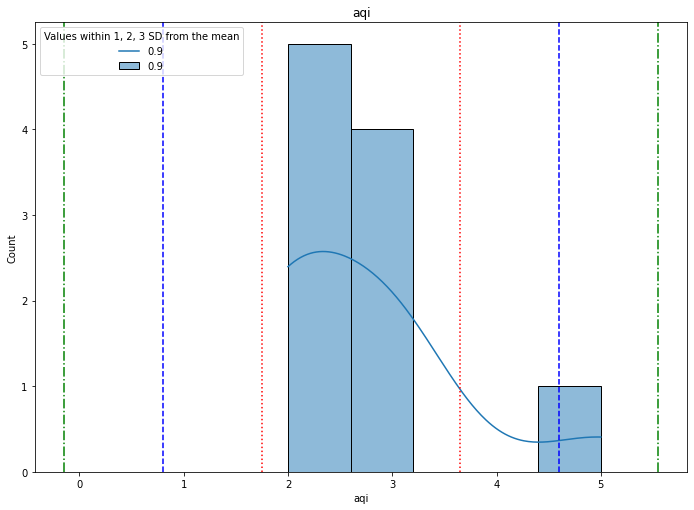

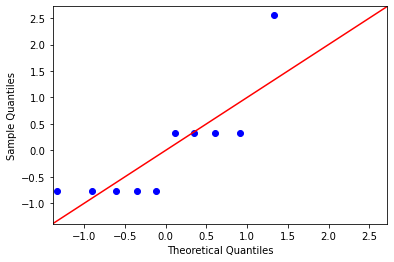

2.7


In [20]:
distribution(tx, 'aqi')

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

the state most affected by the policy seems to be California, but still need further investigation.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [25]:
# Find the mean aqi for your state.

### YOUR CODE HERE ###
sample_mean = ca['aqi'].mean()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [21]:
# Input your confidence level here:

### YOUR CODE HERE ###

alpha = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [28]:
# Calculate your margin of error.

### YOUR CODE HERE ###

# Begin by identifying the z associated with your chosen confidence level.
z_value = 1.96

# Next, calculate your standard error.
standard_error = ca['aqi'].std() / np.sqrt(ca.shape[0])
print(f'Standard Error: {standard_error}')

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = standard_error * z_value
print(f'Margin of error: {margin_of_error}')

Standard Error: 0.8987209641127412
Margin of error: 1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [29]:
# Calculate your confidence interval (upper and lower limits).

### YOUR CODE HERE ###
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)


(10.359719031551148, 13.882705210873095)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [ ]:
# Import stats from scipy.

### YOUR CODE HERE ###

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [31]:
### YOUR CODE HERE ###
stats.norm.interval(alpha=0.95, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

In [35]:
stats.norm.interval(alpha=0.99, loc=sample_mean, scale=standard_error)

(9.806260326136803, 14.43616391628744)

# Considerations

**What are key takeaways from this lab?**

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
* Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.

**What findings would you share with others?**

* Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval. 
* Convey that a confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`, which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
* Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become `[9.80 , 14.43]`. 


**What would you convey to external stakeholders?**

* Explain statistical significance at a high level. 
* Describe California's observed mean AQI and suggest focusing on that state.
* Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
* Convey any potential shortcomings of this analysis, such as the short time period being referenced. 

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 